In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from glob import glob

In [2]:
#resize all images to the expected size
image_size = [224, 224]

#set train, test, validation dataset path
train_path = '/content/drive/My Drive/Datasets/Malaria detection big data/cell_images'

In [ ]:
base_model = keras.applications.vgg19.VGG19(input_shape=image_size + [3], weights = "imagenet", include_top=False)


80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
from glob import glob
out_classes = glob('/content/drive/My Drive/Datasets/Malaria detection big data/cell_images/*')

In [ ]:
out_classes

['/content/drive/My Drive/Datasets/Malaria detection big data/cell_images/Parasitized',
 '/content/drive/My Drive/Datasets/Malaria detection big data/cell_images/Uninfected']

In [ ]:
layer_flatten = keras.layers.Flatten()(base_model.output)
output = keras.layers.Dense(len(out_classes), activation="softmax")(layer_flatten)
model = keras.Model(inputs=base_model.input, outputs=output)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 subset='training')

test_set = train_datagen.flow_from_directory(train_path,
                                             target_size = (224, 224),
                                             batch_size = 16,
                                             class_mode = 'categorical',
                                             subset='validation')


Found 2160 images belonging to 2 classes.
Found 3295 images belonging to 2 classes.


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
824/824 [==============================] - 12689s 15s/step - loss: 0.2709 - accuracy: 0.8988 - val_loss: 0.4336 - val_accuracy: 0.8783
Epoch 2/5
824/824 [==============================] - 189s 229ms/step - loss: 0.2025 - accuracy: 0.9266 - val_loss: 0.5666 - val_accuracy: 0.8364
Epoch 3/5
824/824 [==============================] - 189s 230ms/step - loss: 0.1968 - accuracy: 0.9358 - val_loss: 0.8831 - val_accuracy: 0.7700
Epoch 4/5
824/824 [==============================] - 189s 229ms/step - loss: 0.2128 - accuracy: 0.9371 - val_loss: 0.5365 - val_accuracy: 0.9002
Epoch 5/5
824/824 [==============================] - 189s 229ms/step - loss: 0.1981 - accuracy: 0.9386 - val_loss: 0.8856 - val_accuracy: 0.8783


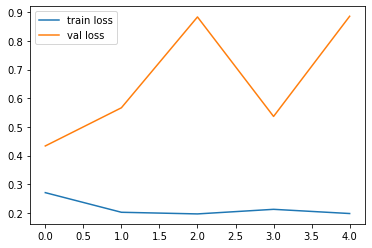

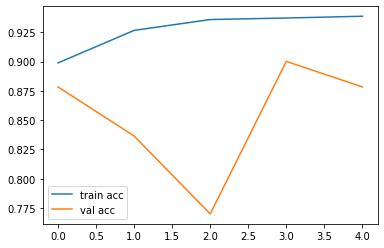

<Figure size 432x288 with 0 Axes>

In [ ]:
#train the model
history = model.fit_generator(
  training_set,
  validation_data = test_set,
  epochs = 5,
  steps_per_epoch = len(training_set),
  validation_steps = len(test_set)
)

#save the model as an h5 file
model.save('/content/drive/My Drive/Datasets/Malaria detection big data/model_vgg19.h5')

#plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [5]:
model.evaluate(test_set)

206/206 [==============================] - 1599s 8s/step - loss: 0.8656 - accuracy: 0.8756


[0.865585446357727, 0.8755690455436707]

In [6]:
#using the model to make predictions
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, ..., 0, 1, 0])